In [1]:
import pandas as pd
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfTransformer, TfidfVectorizer, CountVectorizer

In [12]:
with open('DATA/One.txt') as mytext:
    text_file_1 = mytext.read()
    print('read: ', text)
    words_file_1 = text_file_1.lower().split()
    print('words: ', words)
    uni_words_file_1 = set(words_file_1)
    print('unique words: ', uni_words_file_1)
    
with open('DATA/One.txt') as mytext:
    print('readlines: ', mytext.readlines())

read:  This is a story about dogs
our canine pets
Dogs are furry animals

words:  ['this', 'is', 'a', 'story', 'about', 'dogs', 'our', 'canine', 'pets', 'dogs', 'are', 'furry', 'animals']
uniqaue words:  {'our', 'a', 'pets', 'are', 'furry', 'is', 'about', 'story', 'dogs', 'animals', 'canine', 'this'}
readlines:  ['This is a story about dogs\n', 'our canine pets\n', 'Dogs are furry animals\n']


In [28]:
with open('DATA/Two.txt') as mytext:
    words_file_2 = mytext.read().lower().split()
    uni_words_file_2 = set(words_file_2)
    print('unique words: ', uni_words_file_2)

unique words:  {'fun', 'a', 'waves', 'is', 'about', 'story', 'sport', 'catching', 'surfing', 'this', 'water', 'popular'}


In [16]:
all_uni_set = set()
all_uni_set.update(uni_words_file_1)
all_uni_set.update(uni_words_file_2)
print('full_set: ', all_uni_set)

full_vocab = dict()
i = 0
for word in all_uni_set:
    full_vocab[word] = i
    i = i+1
print('full_dict: ', full_vocab)

full_set:  {'fun', 'a', 'pets', 'are', 'furry', 'waves', 'about', 'sport', 'canine', 'catching', 'our', 'is', 'story', 'dogs', 'animals', 'surfing', 'this', 'water', 'popular'}
full_dict:  {'fun': 0, 'a': 1, 'pets': 2, 'are': 3, 'furry': 4, 'waves': 5, 'about': 6, 'sport': 7, 'canine': 8, 'catching': 9, 'our': 10, 'is': 11, 'story': 12, 'dogs': 13, 'animals': 14, 'surfing': 15, 'this': 16, 'water': 17, 'popular': 18}


In [23]:
# Empty bag of words
all_words = ['']*len(full_vocab)
all_words_freq = [0]*len(full_vocab)

for word in full_vocab:
    word_ind = full_vocab[word]
    all_words[word_ind] = word
    
all_words

['fun',
 'a',
 'pets',
 'are',
 'furry',
 'waves',
 'about',
 'sport',
 'canine',
 'catching',
 'our',
 'is',
 'story',
 'dogs',
 'animals',
 'surfing',
 'this',
 'water',
 'popular']

In [29]:
# Get frequency of word's usage
for word in words_file_1:
    word_ind = full_vocab[word]
    all_words_freq[word_ind] += 1
    
for word in words_file_2:
    word_ind = full_vocab[word]
    all_words_freq[word_ind] += 1
    
all_words_freq

[1, 5, 4, 4, 4, 1, 5, 1, 4, 1, 4, 7, 5, 8, 4, 2, 5, 1, 1]

In [31]:
pd.DataFrame(data=[all_words_freq], columns=all_words)

,fun,a,pets,are,furry,waves,about,sport,canine,catching,our,is,story,dogs,animals,surfing,this,water,popular
0,1,5,4,4,4,1,5,1,4,1,4,7,5,8,4,2,5,1,1


# Sklearn usage

In [34]:
cv = CountVectorizer()

In [49]:
with open('DATA/One.txt') as mytext:
    lines = mytext.readlines()
    word_coll = cv.fit_transform(lines)
print(word_coll)
print('vocabulary_: ', cv.vocabulary_)
print('stop_words_: ', cv.stop_words_)
print(word_coll.todense())

  (0, 10)	1
  (0, 6)	1
  (0, 9)	1
  (0, 0)	1
  (0, 4)	1
  (1, 7)	1
  (1, 3)	1
  (1, 8)	1
  (2, 4)	1
  (2, 2)	1
  (2, 5)	1
  (2, 1)	1
vocabulary_:  {'this': 10, 'is': 6, 'story': 9, 'about': 0, 'dogs': 4, 'our': 7, 'canine': 3, 'pets': 8, 'are': 2, 'furry': 5, 'animals': 1}
stop_words_:  set()
[[1 0 0 0 1 0 1 0 0 1 1]
 [0 0 0 1 0 0 0 1 1 0 0]
 [0 1 1 0 1 1 0 0 0 0 0]]


In [45]:
tfidf_transformer = TfidfTransformer()
tfidf_transformer.fit_transform(word_coll).todense()

matrix([[0.46735098, 0.        , 0.        , 0.        , 0.35543247,
         0.        , 0.46735098, 0.        , 0.        , 0.46735098,
         0.46735098],
        [0.        , 0.        , 0.        , 0.57735027, 0.        ,
         0.        , 0.        , 0.57735027, 0.57735027, 0.        ,
         0.        ],
        [0.        , 0.52863461, 0.52863461, 0.        , 0.40204024,
         0.52863461, 0.        , 0.        , 0.        , 0.        ,
         0.        ]])

In [55]:
pipe = Pipeline([('cv',CountVectorizer()),('tfidf',TfidfTransformer())])
results = pipe.fit_transform(lines)
print(results)
results.todense()

  (0, 10)	0.4673509818107163
  (0, 9)	0.4673509818107163
  (0, 6)	0.4673509818107163
  (0, 4)	0.35543246785041743
  (0, 0)	0.4673509818107163
  (1, 8)	0.5773502691896257
  (1, 7)	0.5773502691896257
  (1, 3)	0.5773502691896257
  (2, 5)	0.5286346066596935
  (2, 4)	0.4020402441612698
  (2, 2)	0.5286346066596935
  (2, 1)	0.5286346066596935


matrix([[0.46735098, 0.        , 0.        , 0.        , 0.35543247,
         0.        , 0.46735098, 0.        , 0.        , 0.46735098,
         0.46735098],
        [0.        , 0.        , 0.        , 0.57735027, 0.        ,
         0.        , 0.        , 0.57735027, 0.57735027, 0.        ,
         0.        ],
        [0.        , 0.52863461, 0.52863461, 0.        , 0.40204024,
         0.52863461, 0.        , 0.        , 0.        , 0.        ,
         0.        ]])

# From file

In [101]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.metrics import ConfusionMatrixDisplay,classification_report, confusion_matrix, accuracy_score

In [56]:
df = pd.read_csv("DATA/airline_tweets.csv")

In [57]:
df.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


In [58]:
df.columns

Index(['tweet_id', 'airline_sentiment', 'airline_sentiment_confidence',
       'negativereason', 'negativereason_confidence', 'airline',
       'airline_sentiment_gold', 'name', 'negativereason_gold',
       'retweet_count', 'text', 'tweet_coord', 'tweet_created',
       'tweet_location', 'user_timezone'],
      dtype='object')

In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14640 entries, 0 to 14639
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   tweet_id                      14640 non-null  int64  
 1   airline_sentiment             14640 non-null  object 
 2   airline_sentiment_confidence  14640 non-null  float64
 3   negativereason                9178 non-null   object 
 4   negativereason_confidence     10522 non-null  float64
 5   airline                       14640 non-null  object 
 6   airline_sentiment_gold        40 non-null     object 
 7   name                          14640 non-null  object 
 8   negativereason_gold           32 non-null     object 
 9   retweet_count                 14640 non-null  int64  
 10  text                          14640 non-null  object 
 11  tweet_coord                   1019 non-null   object 
 12  tweet_created                 14640 non-null  object 
 13  t

In [60]:
df.describe()

,tweet_id,airline_sentiment_confidence,negativereason_confidence,retweet_count
count,1.464000e+04,14640.000000,10522.000000,14640.000000
mean,5.692184e+17,0.900169,0.638298,0.082650
std,7.791112e+14,0.162830,0.330440,0.745778
min,5.675883e+17,0.335000,0.000000,0.000000
25%,5.685592e+17,0.692300,0.360600,0.000000
50%,5.694779e+17,1.000000,0.670600,0.000000
75%,5.698905e+17,1.000000,1.000000,0.000000
max,5.703106e+17,1.000000,1.000000,44.000000


In [67]:
df.isna().sum()

tweet_id                            0
airline_sentiment                   0
airline_sentiment_confidence        0
negativereason                   5462
negativereason_confidence        4118
airline                             0
airline_sentiment_gold          14600
name                                0
negativereason_gold             14608
retweet_count                       0
text                                0
tweet_coord                     13621
tweet_created                       0
tweet_location                   4733
user_timezone                    4820
dtype: int64

<Axes: xlabel='airline', ylabel='count'>

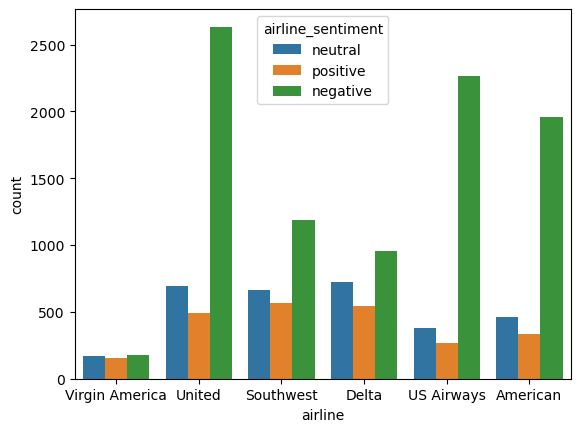

In [70]:
sns.countplot(data=df, x='airline', hue='airline_sentiment')

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'Bad Flight'),
  Text(1, 0, "Can't Tell"),
  Text(2, 0, 'Late Flight'),
  Text(3, 0, 'Customer Service Issue'),
  Text(4, 0, 'Flight Booking Problems'),
  Text(5, 0, 'Lost Luggage'),
  Text(6, 0, 'Flight Attendant Complaints'),
  Text(7, 0, 'Cancelled Flight'),
  Text(8, 0, 'Damaged Luggage'),
  Text(9, 0, 'longlines')])

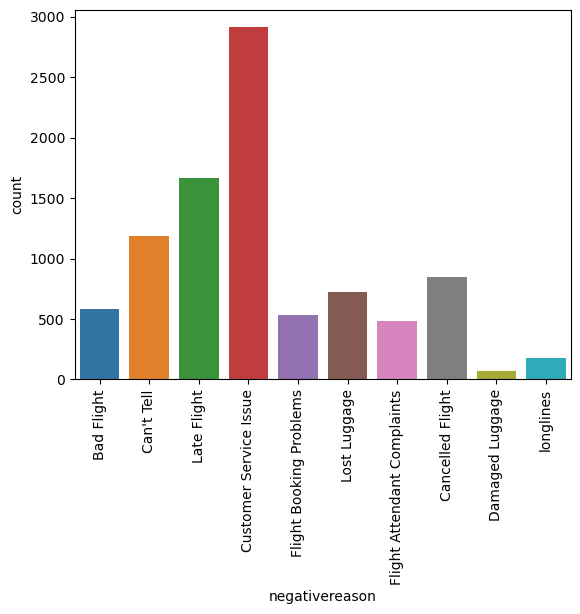

In [73]:
sns.countplot(data=df,x='negativereason')
plt.xticks(rotation=90)

<Axes: xlabel='airline_sentiment', ylabel='count'>

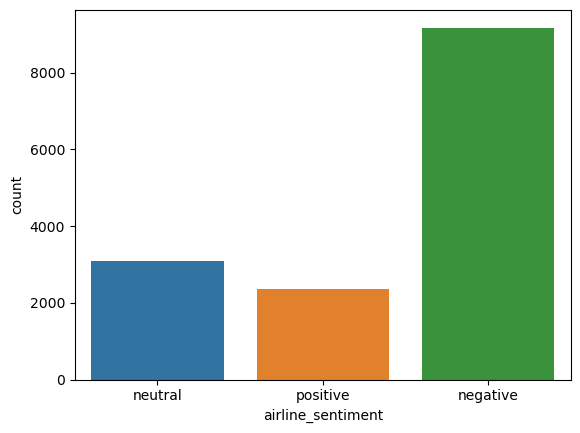

In [74]:
sns.countplot(data=df,x='airline_sentiment')

In [75]:
df['airline_sentiment'].value_counts()

airline_sentiment
negative    9178
neutral     3099
positive    2363
Name: count, dtype: int64

In [76]:
X = df['text']
y = df['airline_sentiment']

In [87]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)
X_test, X_verify, y_test, y_verify = train_test_split(X_test, y_test, test_size=0.5, random_state=101)

In [88]:
tfidf = TfidfVectorizer(stop_words='english')
tfidf.fit(X_train)
X_train_tfidf = tfidf.transform(X_train)
X_test_tfidf = tfidf.transform(X_test)

In [90]:
# Naive Bayers
nb = MultinomialNB()
nb.fit(X_train_tfidf, y_train)

MultinomialNB()

In [91]:
#Logistic Regression
log = LogisticRegression(max_iter=1000)
log.fit(X_train_tfidf, y_train)

LogisticRegression(max_iter=1000)

In [92]:
# Support Vector Machine Regression
svc = LinearSVC()
svc.fit(X_train_tfidf, y_train)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


LinearSVC()

In [102]:
# Performance Evaluation

def report(model, title = ''):
    preds = model.predict(X_test_tfidf)
    print(classification_report(y_test,preds))
    print(accuracy_score(y_test,preds))
    cm = confusion_matrix(y_test,preds)
    print(cm)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=model.classes_)
    disp.plot()
    plt.title(title)


              precision    recall  f1-score   support

    negative       0.67      0.99      0.80       917
     neutral       0.77      0.16      0.26       308
    positive       0.91      0.13      0.23       239

    accuracy                           0.68      1464
   macro avg       0.78      0.43      0.43      1464
weighted avg       0.73      0.68      0.59      1464

0.6769125683060109
[[910   6   1]
 [257  49   2]
 [198   9  32]]


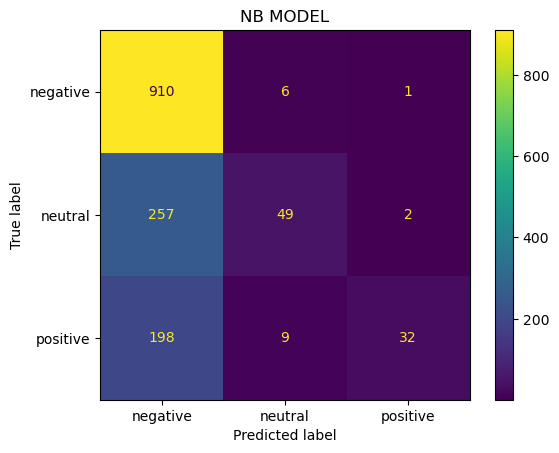

In [103]:
report(nb, 'NB MODEL')

              precision    recall  f1-score   support

    negative       0.80      0.93      0.86       917
     neutral       0.63      0.48      0.55       308
    positive       0.81      0.54      0.64       239

    accuracy                           0.77      1464
   macro avg       0.75      0.65      0.68      1464
weighted avg       0.77      0.77      0.76      1464

0.7739071038251366
[[856  49  12]
 [141 149  18]
 [ 73  38 128]]


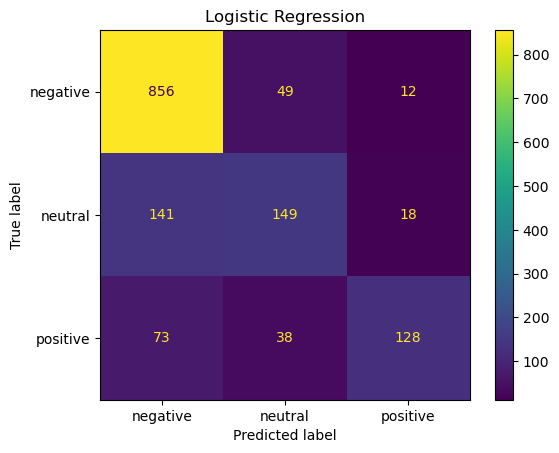

In [104]:
report(log, 'Logistic Regression')

              precision    recall  f1-score   support

    negative       0.83      0.89      0.86       917
     neutral       0.60      0.55      0.57       308
    positive       0.77      0.62      0.69       239

    accuracy                           0.78      1464
   macro avg       0.73      0.69      0.71      1464
weighted avg       0.77      0.78      0.77      1464

0.7773224043715847
[[820  77  20]
 [115 169  24]
 [ 54  36 149]]


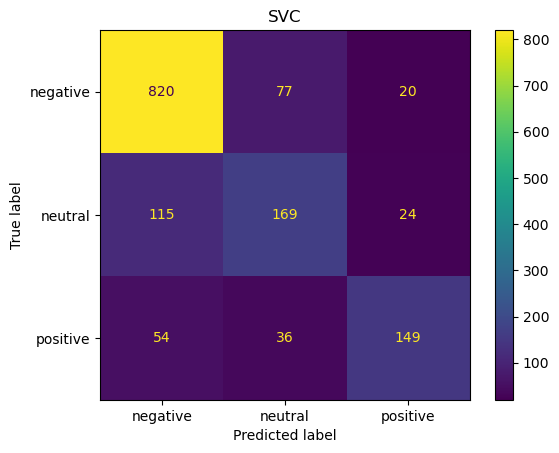

In [105]:
report(svc, 'SVC')

In [112]:
from joblib import dump, load 

final_model = Pipeline([('tfidf', TfidfVectorizer()), ('svc', LinearSVC())])
final_model.fit(X_train, y_train)
dump(final_model, 'text_classification_regression.joblib') 
preds = final_model.predict(X_test)
print(accuracy_score(preds, y_test))
print(confusion_matrix(preds, y_test))

0.7923497267759563
[[828 107  46]
 [ 69 178  39]
 [ 20  23 154]]


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


In [113]:
loaded_model = load('text_classification_regression.joblib')
preds = loaded_model.predict(X_verify)
print(accuracy_score(preds, y_verify))
print(confusion_matrix(preds, y_verify))

0.7957650273224044
[[819 105  45]
 [ 69 181  34]
 [ 12  34 165]]
